## Exercise for KYBS3050

### Mika Lammi 2022

## Description of data and goal of this exercise

The goal of this exercise is to train different machine learning algorithms with supervised learning to classify given data and then evaluate the effectiveness of trained models.

### Creating a machine learning algorithm to detect spam emails

My goal is to create a machine learning model which can detect spam emails from non-spam emails. The practical use case for such model would be to have it filter out spam emails from user's inbox and move them to the spam folder.

### What data am I using

The data I am using in this exercise is Spambase Data Set from UCI Machine learning repository [(source of the dataset)](https://archive.ics.uci.edu/ml/datasets/Spambase). It is a collection of emails separated into two categories: spam and non-spam e-mails. The source of spam e-mails come from their postmaster and individuals who had filed those emails as spam. Collection of non-spam e-mails come from filed work and personal e-mails. The data is only useful for constructing personalized spam filters and it isn't really suitable for generating all purpose spam filters for general public. However, I think that his dataset is suitable for testing different machine learning algorithms. The data is already preprocessed with natural language processing, and its most useful features have been extracted into numeric values like frequencies of different words.




In [2]:
import numpy as np
import scipy as sp
import pandas as pd

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


### Downloading the dataset and setting things up:

In [3]:
# Download the data for usage
def getDataset():
    url = "https://www.dropbox.com/s/vwiyk1qeq87xuku/spambase.data.csv?dl=1"
    dataset = pd.read_csv(url).to_numpy()
    headers = pd.read_csv(url, index_col=0, nrows=0).columns.to_numpy()
    cols = dataset.shape[1]
    classifications = dataset[:, cols-1]
    data = dataset[:,0:cols-2]
    feature_names = headers[0:cols-2]
    return data, classifications, feature_names

# classification: 1 = spam, 0 = non-spam
_X, y, feature_names = getDataset()

In [4]:
print("Data shape: ", _X.shape)
print("Number of features: ", len(feature_names))
print("Feature names: ", feature_names)
print(f"Percentage of spam emails: {(sum(y)/len(y))*100:.2f}%")

Data shape:  (4601, 56)
Number of features:  56
Feature names:  ['word_freq_address' 'word_freq_all' 'word_freq_3d' 'word_freq_our'
 'word_freq_over' 'word_freq_remove' 'word_freq_internet'
 'word_freq_order' 'word_freq_mail' 'word_freq_receive' 'word_freq_will'
 'word_freq_people' 'word_freq_report' 'word_freq_addresses'
 'word_freq_free' 'word_freq_business' 'word_freq_email' 'word_freq_you'
 'word_freq_credit' 'word_freq_your' 'word_freq_font' 'word_freq_000'
 'word_freq_money' 'word_freq_hp' 'word_freq_hpl' 'word_freq_george'
 'word_freq_650' 'word_freq_lab' 'word_freq_labs' 'word_freq_telnet'
 'word_freq_857' 'word_freq_data' 'word_freq_415' 'word_freq_85'
 'word_freq_technology' 'word_freq_1999' 'word_freq_parts' 'word_freq_pm'
 'word_freq_direct' 'word_freq_cs' 'word_freq_meeting'
 'word_freq_original' 'word_freq_project' 'word_freq_re' 'word_freq_edu'
 'word_freq_table' 'word_freq_conference' 'char_freq_;' 'char_freq_('
 'char_freq_[' 'char_freq_!' 'char_freq_$' 'char_freq_#'
 

In [5]:
df = pd.DataFrame(_X, 
                  columns = feature_names)
df['is_spam'] = y
df

,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61.0,1.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1.0
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485.0,1.0
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40.0,1.0
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3.0,0.0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4.0,0.0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6.0,0.0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5.0,0.0


### Visualizing the data:

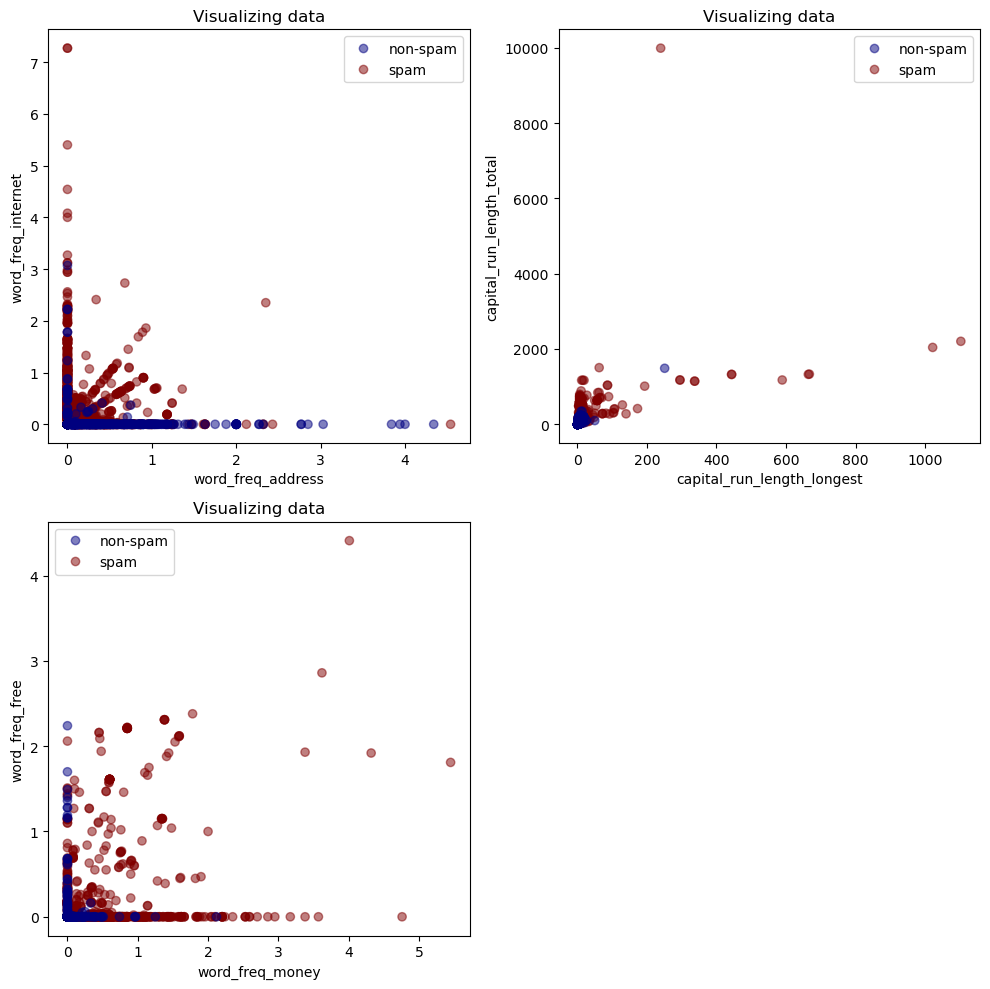

In [6]:
fig = plt.figure(dpi=100, figsize=(10, 10))
fig.add_subplot(2,2,1)
feature1 = 0
feature2 = 6
scatter = plt.scatter(_X[:,feature1],_X[:,feature2],c=y, alpha=0.5)
plt.set_cmap('jet')
plt.title("Visualizing data")
plt.xlabel(feature_names[feature1])
plt.ylabel(feature_names[feature2])
handles = scatter.legend_elements()[0]
plt.legend(handles=handles, labels=['non-spam', 'spam'])

fig.add_subplot(2,2,2)
feature3 = 54
feature4 = 55
scatter = plt.scatter(_X[:,feature3],_X[:,feature4],c=y, alpha=0.5)
plt.set_cmap('jet')
plt.title("Visualizing data")
plt.xlabel(feature_names[feature3])
plt.ylabel(feature_names[feature4])
handles = scatter.legend_elements()[0]
plt.legend(handles=handles, labels=['non-spam', 'spam'])

fig.add_subplot(2,2,3)
feature5 = 22
feature6 = 14
scatter = plt.scatter(_X[:,feature5],_X[:,feature6],c=y, alpha=0.5)
plt.set_cmap('jet')
plt.title("Visualizing data")
plt.xlabel(feature_names[feature5])
plt.ylabel(feature_names[feature6])
handles = scatter.legend_elements()[0]
plt.legend(handles=handles, labels=['non-spam', 'spam'])


plt.tight_layout()
plt.show()

As we can see from the visualization, the data doesn't behave in a linear manner. There are clear visual differences on how spam and non-spam data behave. For example: In non-spam emails, the words "free" and "money" rarely occurr within same email, but with spam emails it is possible to have those both words within a same email.

### Splitting the data

The data will be split into training data (75%) and test data (15%). We will use the training data (75%) for training the models and validating the results with cross-validation, and then we use the rest of the data to test the results of trained model.

In [7]:
# Split data into training and test sets
def splitData(X, y, random_state=100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=random_state, shuffle=True)
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = splitData(_X, y)

print("Training data shape: ", X_train.shape)
print("Test data shape: ", X_test.shape)
print("Number of samples in the test data: ", len(y_test))
print("Number of samples in the training data: ", len(y_train))

Training data shape:  (3910, 56)
Test data shape:  (691, 56)
Number of samples in the test data:  691
Number of samples in the training data:  3910


### Preprocessing data

Standardization of a dataset is a common requirement for many machine learning estimators. I will standardize the data so that it looks like standard normally distributed data.

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler() # Standardize so that average is 0 and variance is 1
# pca = PCA(n_components=0.95) # We want the explained variance ratios to be high (in this case, 95%)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# n_principal_components = X_train_scaled.shape[1]
# print("Number of principal components (explained variance >= 95%): ", n_principal_components)

### Visualizing preprocessed data:

In [9]:
# Visualize scaled and standardized data
df = pd.DataFrame(X_train_scaled)
df['is spam'] = y_train
df

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,is spam
0,-0.342360,-0.164400,-0.553040,-0.045785,-0.458015,-0.362924,-0.282751,-0.287340,-0.321100,-0.396697,...,-0.122216,-0.159443,-0.508239,-0.154387,-0.318851,-0.296063,-0.126395,0.004438,-0.209048,0.0
1,-0.342360,-0.164400,-0.553040,-0.045785,-0.458015,-0.362924,-0.282751,-0.287340,-0.321100,-0.396697,...,-0.122216,-0.159443,0.212488,-0.154387,-0.318851,-0.296063,-0.126395,-0.099044,-0.204222,0.0
2,1.810825,-0.164400,0.759330,-0.045785,-0.458015,-0.362924,-0.282751,-0.287340,-0.321100,0.718986,...,-0.122216,-0.159443,-0.508239,-0.154387,2.330080,-0.296063,-0.126395,-0.064038,-0.093227,1.0
3,-0.342360,-0.164400,-0.553040,-0.045785,-0.458015,-0.362924,-0.282751,0.826251,-0.321100,-0.396697,...,-0.122216,-0.159443,-0.333409,-0.154387,-0.318851,-0.296063,-0.126395,-0.099044,-0.073924,0.0
4,-0.342360,0.775139,-0.553040,-0.045785,-0.458015,-0.362924,-0.282751,-0.287340,-0.321100,1.682530,...,-0.122216,-0.159443,0.290983,-0.154387,-0.318851,-0.296063,-0.126395,-0.128610,-0.252481,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,3.181033,-0.164400,1.594474,-0.045785,-0.458015,-0.362924,-0.282751,-0.287340,-0.321100,-0.396697,...,-0.122216,-0.159443,-0.508239,-0.154387,-0.318851,-0.296063,-0.126395,-0.113147,-0.233178,0.0
3906,-0.342360,-0.164400,-0.553040,-0.045785,-0.458015,-0.362924,-0.282751,-0.287340,-0.321100,-0.396697,...,-0.122216,-0.159443,-0.508239,-0.154387,-0.318851,-0.296063,-0.126395,-0.116311,-0.228352,0.0
3907,-0.342360,-0.164400,0.898520,-0.045785,0.066090,-0.362924,-0.282751,-0.287340,-0.321100,-0.396697,...,-0.122216,-0.159443,-0.508239,-0.154387,0.406752,0.416279,-0.126395,-0.046209,0.022594,1.0
3908,-0.342360,-0.164400,-0.553040,-0.045785,-0.458015,-0.362924,-0.282751,-0.287340,-0.321100,-0.396697,...,-0.122216,-0.159443,-0.508239,-0.154387,-0.318851,1.034167,-0.126395,-0.108919,-0.233178,1.0


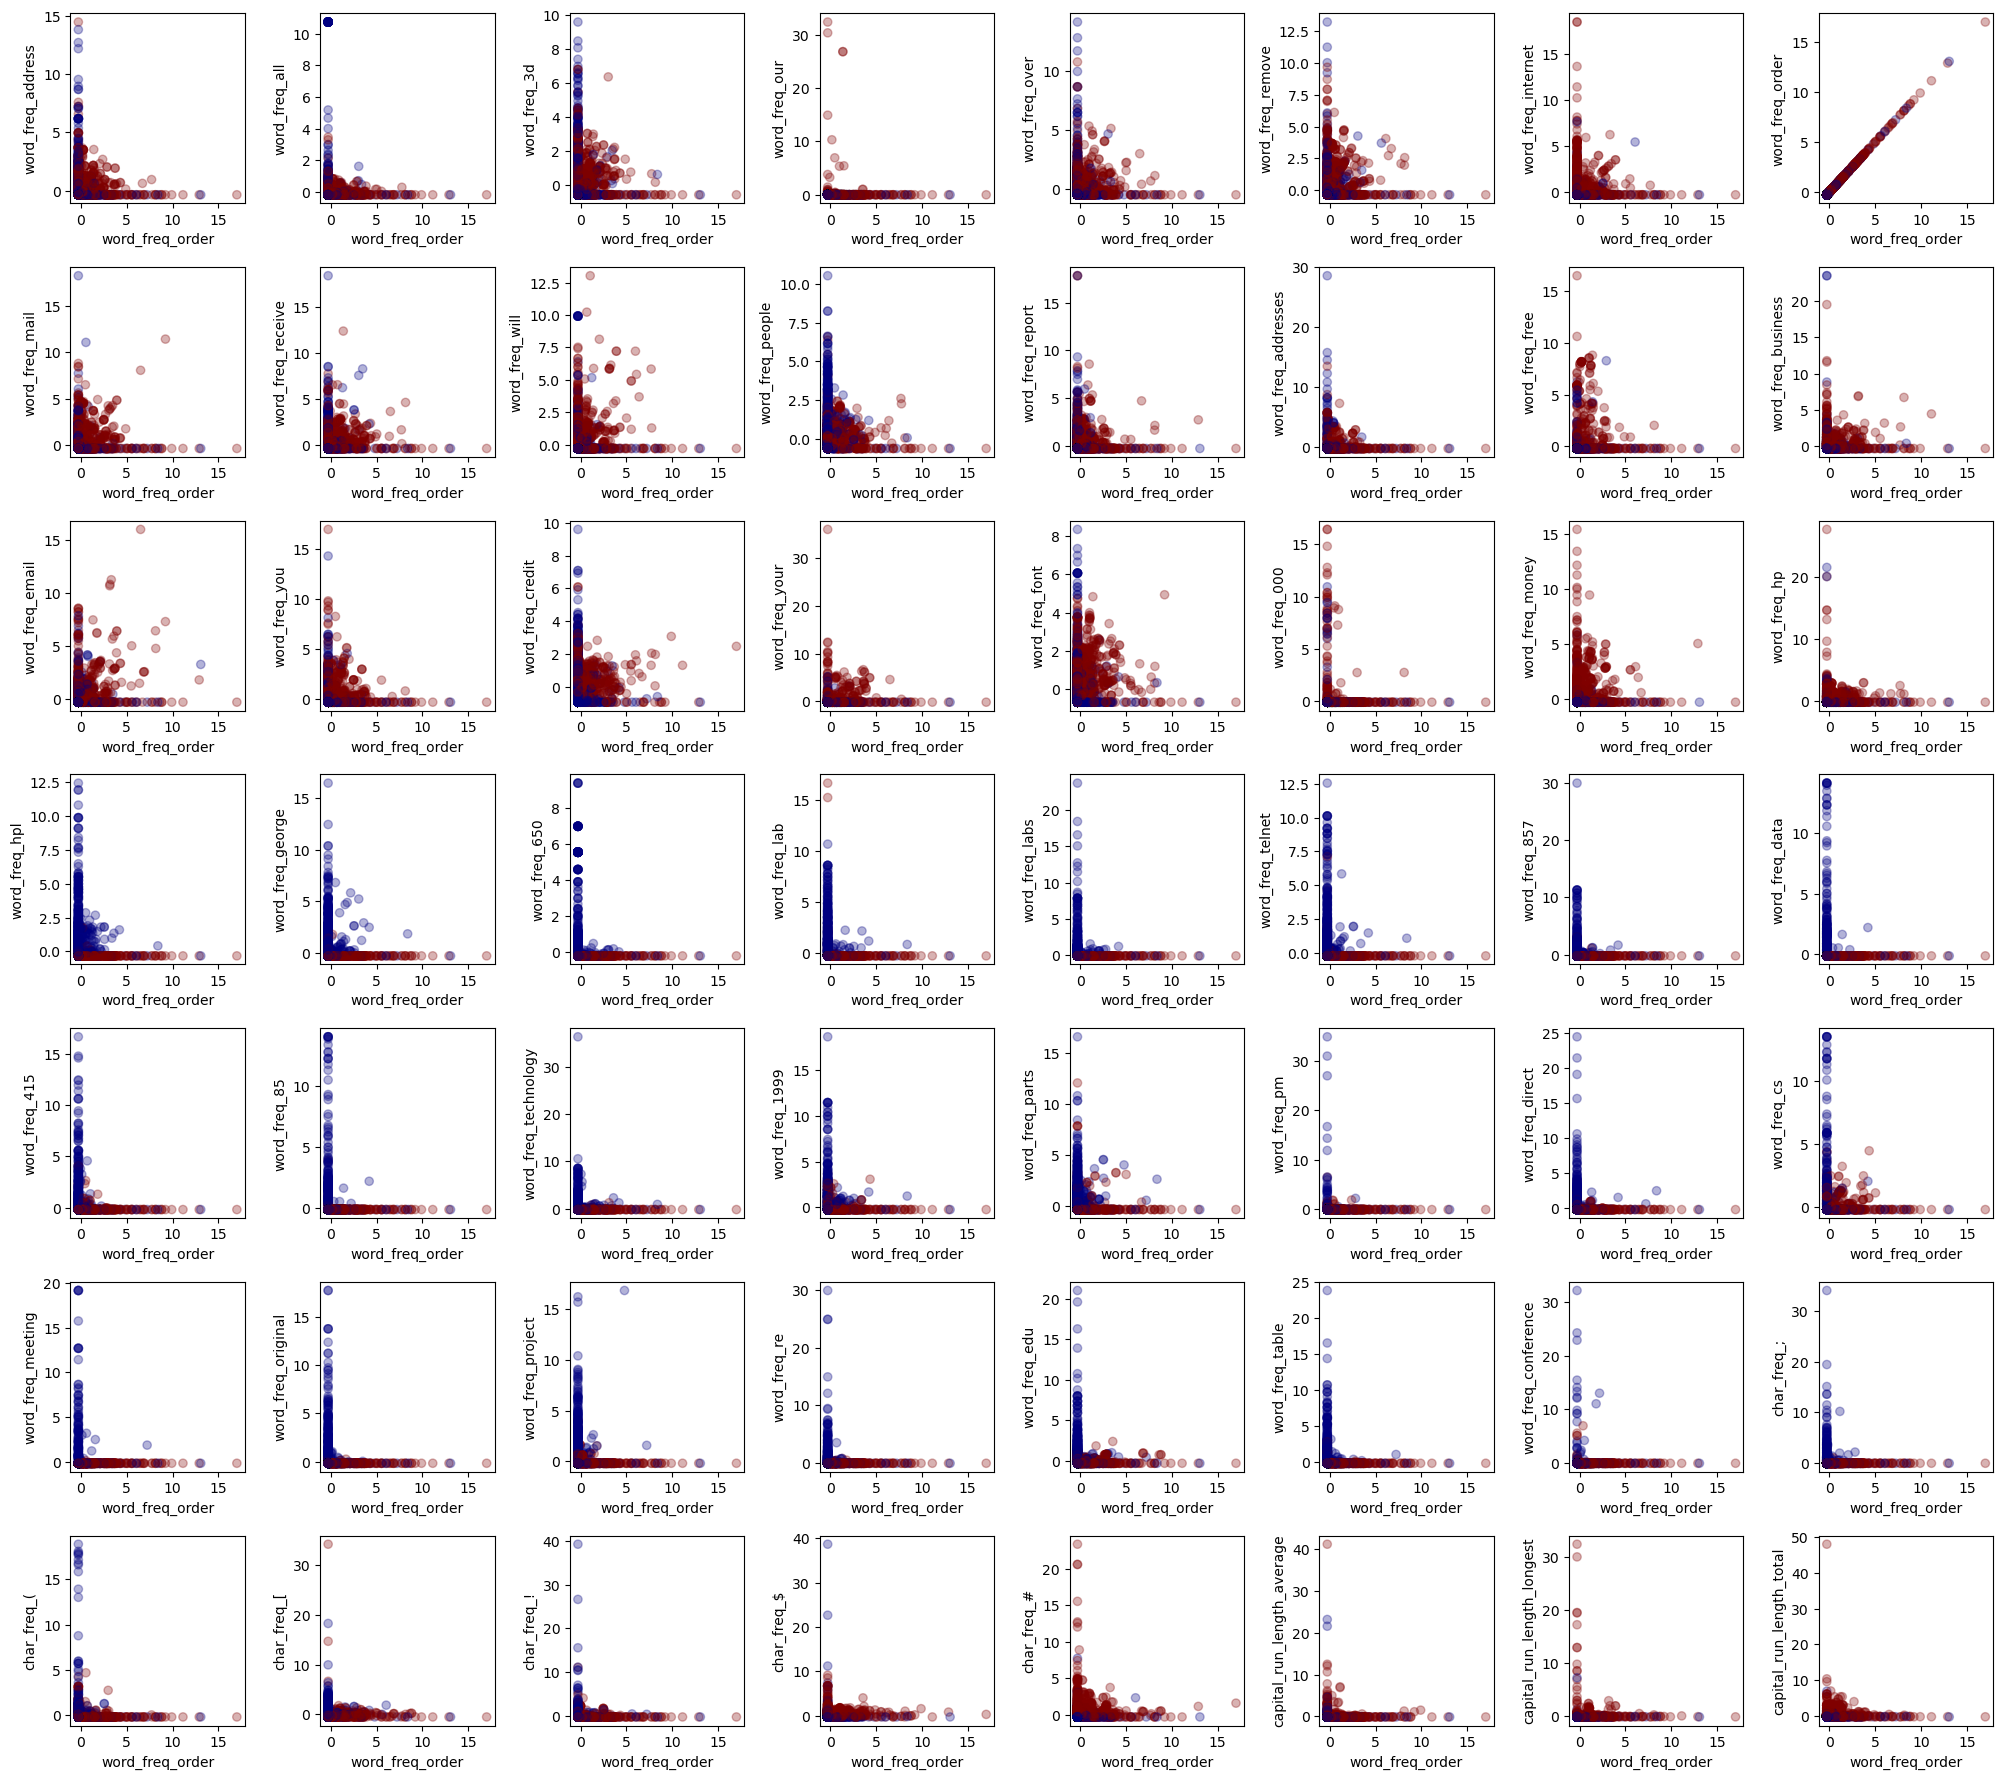

In [11]:
import math

def plot(X_std, y):
    dims = X_std.shape[1]
    temp = math.sqrt(dims)
    dim = math.ceil(temp)
    fig = plt.figure(dpi=100, figsize=(20, 20))
    plt.set_cmap("jet")
    x_dim = 7
    for i in range(0, dims):
            fig.add_subplot(dim, dim, i+1)
            plt.scatter(X_std[:,x_dim], X_std[:,i], c=y, alpha=0.3)
            plt.xlabel(feature_names[x_dim])
            ylabel = feature_names[i]
            plt.ylabel(ylabel)
    fig.tight_layout()
    plt.show()

plot(X_train_scaled, y_train)


## What metrics to use for model evaluation?

In email spam detection, a false positive would mean that an email that is non-spam has been falsely identified as spam, thus the user might lose important emails if the precision is not high for the spam detection model. On the other hand, high number of false negatives would mean that the spam filter is not working very well (spam messages are not filtered out), so recall is also important metric for our spam detection model.

Accuracy is a good "all around" evaluation metric for this case.

### Using Grid search to find the best Keras neural network hyperparameters:

In [12]:
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from scikeras.wrappers import KerasClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
tf.random.set_seed(100)
print("TensorFlow version:", tf.__version__)

def create_keras_model(activation="relu", neurons=128, dropout=0, optimizer="Adam"):
    model = Sequential()
    model.add(Input(shape=(56,)))
    model.add(Dense(neurons, activation=activation,))
    model.add(Dense(neurons, activation=activation))
    if dropout != None: model.add(Dropout(dropout))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss=tf.keras.losses.binary_crossentropy,
        optimizer=optimizer,
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    ])
    return model

pca_keras = PCA(n_components=47)
clf_keras = KerasClassifier(model=create_keras_model, epochs= 50, batch_size=40, verbose= 0, random_state=100)
pipe_keras = Pipeline(steps=[('scaler', scaler), ("clf", clf_keras)])

# Keras grid params
params_keras = dict(
    clf__model__activation = ['softmax', 'relu', 'tanh', 'sigmoid', 'linear'], 
    clf__model__neurons = [8, 16, 32, 64, 128, 256], 
    clf__model__dropout=[0, 0.10, 0.20, 0.30], 
    clf__model__optimizer=['SGD', 'Adam', 'Adamax'])

grid_search_keras = GridSearchCV(
    pipe_keras, 
    param_grid=params_keras, 
    n_jobs=-1, 
    cv=5, 
    error_score="raise", 
    verbose=2, 
    refit=True,
    scoring='accuracy')

TensorFlow version: 2.9.1


In [13]:
grid_search_keras.fit(X_train, y_train)
print("Max Precision Registred: {} using {}".format(round(grid_search_keras.best_score_,3), 
                                                   grid_search_keras.best_params_))


Fitting 5 folds for each of 360 candidates, totalling 1800 fits


c:\Users\miksu\anaconda3\envs\KYBS3050\lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Max Precision Registred: 0.946 using {'clf__model__activation': 'relu', 'clf__model__dropout': 0.3, 'clf__model__neurons': 256, 'clf__model__optimizer': 'Adamax'}


In [14]:
grid_search_keras.score(X_train, y_train)

0.9872122762148338

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

# Satunnaismetsä
clf_rf = RandomForestClassifier(random_state=100)
pipe_rf = Pipeline(steps=[('scaler', scaler), ("clf", clf_rf)])
params_rf = dict(
    clf__max_depth=[3, 4, 5, 6, 7],
    clf__n_estimators=[6,7,8,9,10,11,12,13],
    clf__max_features=[1],
)
grid_search_rf = GridSearchCV(pipe_rf, param_grid=params_rf, n_jobs=-1, cv=5, error_score=2, verbose=2, refit=True, scoring="accuracy")

# Naiivi Bayes luokitin
normalizer = Normalizer()
clf_nb = MultinomialNB()
pipe_nb = Pipeline(steps=[('normalizer', normalizer), ("clf", clf_nb)])
params_nb = dict(
     clf__alpha=[0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
)
grid_search_nb = GridSearchCV(pipe_nb, param_grid=params_nb, n_jobs=-1, cv=5, error_score=2, verbose=2, refit=True, scoring="accuracy")

# Logistinen regressio
clf_lr = LogisticRegression(random_state=100)
pipe_lr = Pipeline(steps=[('scaler', scaler), ("clf", clf_lr)])
params_lr = dict(
    clf__solver=["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
)
grid_search_lr = GridSearchCV(pipe_lr, param_grid=params_lr, n_jobs=-1, cv=5, error_score=2, verbose=2, refit=True, scoring="accuracy")

# K-lähimmän naapurin menetelmä
clf_kn = KNeighborsClassifier()
pipe_kn = Pipeline(steps=[('scaler', scaler), ("clf", clf_kn)])
params_kn = dict(
    clf__n_neighbors= np.arange(3,10)
)
grid_search_kn = GridSearchCV(pipe_kn, param_grid=params_kn, n_jobs=-1, cv=5, error_score=2, verbose=2, refit=True, scoring="accuracy")

# Tukivektorikone
clf_svm = SVC(probability=True, random_state=100)
pipe_svm = Pipeline(steps=[('scaler', scaler), ("clf", clf_svm)])
params_svm = dict(
    clf__kernel=["linear", "rbf", "poly", "sigmoid"],
    clf__C= [0.1, 1, 10, 100],
    clf__gamma= [1, 0.1, 0.01, 0.001]
)
grid_search_svm = GridSearchCV(pipe_svm, param_grid=params_svm, n_jobs=-1, cv=5, error_score=2, verbose=2, refit=True, scoring="accuracy")

# Monikerroksinen perseptroniverkko
clf_mlp = MLPClassifier(random_state=100)
pipe_mlp = Pipeline(steps=[('scaler', scaler), ("clf", clf_mlp)])
params_mlp = dict(
    clf__alpha=[0.5, 1, 1.5, 2],
    clf__max_iter=[500, 1000]
)
grid_search_mlp = GridSearchCV(pipe_mlp, param_grid=params_mlp, n_jobs=-1, cv=5, error_score=2, verbose=2, refit=True, scoring="accuracy")

# Päätöspuu
clf_dt = DecisionTreeClassifier(random_state=100)
pipe_dt = Pipeline(steps=[('scaler', scaler), ("clf", clf_dt)])
params_dt = dict(
    clf__max_depth=[3,4,5,6,7]
)
grid_search_dt = GridSearchCV(pipe_dt, param_grid=params_dt, n_jobs=-1, cv=5, error_score=2, verbose=2, refit=True, scoring="accuracy")



In [16]:
grid_search_rf.fit(X_train, y_train)
print("Max Accuracy Registred: {} using {}".format(round(grid_search_rf.best_score_,3), 
                                                   grid_search_rf.best_params_))
grid_search_nb.fit(X_train, y_train)
print("Max Accuracy Registred: {} using {}".format(round(grid_search_nb.best_score_,3), 
                                                    grid_search_nb.best_params_))
grid_search_lr.fit(X_train, y_train)
print("Max Accuracy Registred: {} using {}".format(round(grid_search_lr.best_score_,3), 
                                                   grid_search_lr.best_params_))
grid_search_kn.fit(X_train, y_train)
print("Max Accuracy Registred: {} using {}".format(round(grid_search_kn.best_score_,3), 
                                                   grid_search_kn.best_params_))
grid_search_svm.fit(X_train, y_train)
print("Max Accuracy Registred: {} using {}".format(round(grid_search_svm.best_score_,3), 
                                                   grid_search_svm.best_params_))
grid_search_mlp.fit(X_train, y_train)
print("Max Accuracy Registred: {} using {}".format(round(grid_search_mlp.best_score_,3), 
                                                   grid_search_mlp.best_params_))
grid_search_dt.fit(X_train, y_train)
print("Max Accuracy Registred: {} using {}".format(round(grid_search_dt.best_score_,3), 
                                                   grid_search_dt.best_params_))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Max Accuracy Registred: 0.869 using {'clf__max_depth': 6, 'clf__max_features': 1, 'clf__n_estimators': 7}
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Max Accuracy Registred: 0.766 using {'clf__alpha': 1e-05}
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Max Accuracy Registred: 0.924 using {'clf__solver': 'newton-cg'}
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Max Accuracy Registred: 0.9 using {'clf__n_neighbors': 7}
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Max Accuracy Registred: 0.932 using {'clf__C': 100, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Max Accuracy Registred: 0.941 using {'clf__alpha': 0.5, 'clf__max_iter': 500}
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Max Accuracy Registred: 0.914 using {'clf__max_depth': 7}


### Visualizing results:

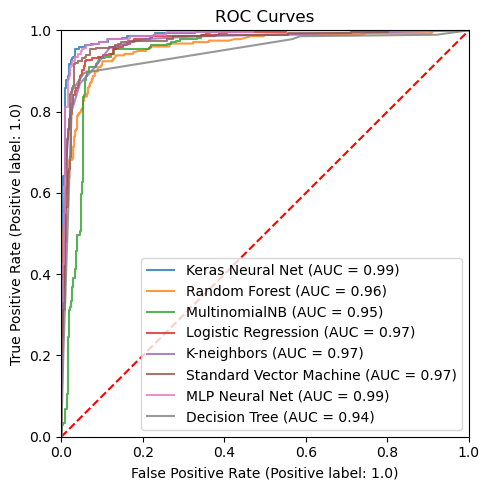

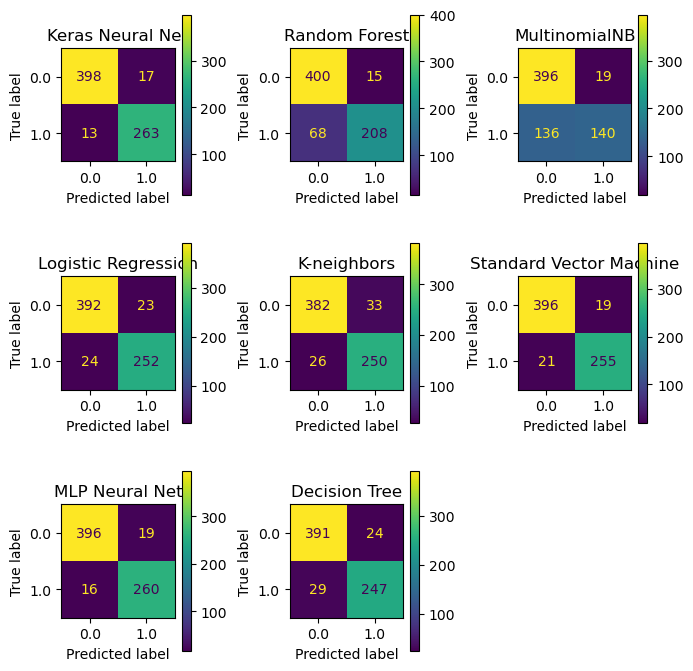

,precision,recall,f1-score,support
0.0,0.968370,0.959036,0.963680,415.000000
1.0,0.939286,0.952899,0.946043,276.000000
accuracy,0.956585,0.956585,0.956585,0.956585
macro avg,0.953828,0.955967,0.954862,691.000000
weighted avg,0.956753,0.956585,0.956636,691.000000


,precision,recall,f1-score,support
0.0,0.854701,0.963855,0.906002,415.000000
1.0,0.932735,0.753623,0.833667,276.000000
accuracy,0.879884,0.879884,0.879884,0.879884
macro avg,0.893718,0.858739,0.869835,691.000000
weighted avg,0.885870,0.879884,0.877110,691.000000


,precision,recall,f1-score,support
0.0,0.744361,0.954217,0.836325,415.000000
1.0,0.880503,0.507246,0.643678,276.000000
accuracy,0.775687,0.775687,0.775687,0.775687
macro avg,0.812432,0.730732,0.740002,691.000000
weighted avg,0.798739,0.775687,0.759378,691.000000


,precision,recall,f1-score,support
0.0,0.942308,0.944578,0.943442,415.000000
1.0,0.916364,0.913043,0.914701,276.000000
accuracy,0.931983,0.931983,0.931983,0.931983
macro avg,0.929336,0.928811,0.929071,691.000000
weighted avg,0.931945,0.931983,0.931962,691.000000


,precision,recall,f1-score,support
0.0,0.936275,0.920482,0.928311,415.000000
1.0,0.883392,0.905797,0.894454,276.000000
accuracy,0.914616,0.914616,0.914616,0.914616
macro avg,0.909833,0.913140,0.911383,691.000000
weighted avg,0.915152,0.914616,0.914788,691.000000


,precision,recall,f1-score,support
0.0,0.949640,0.954217,0.951923,415.000000
1.0,0.930657,0.923913,0.927273,276.000000
accuracy,0.942113,0.942113,0.942113,0.942113
macro avg,0.940149,0.939065,0.939598,691.000000
weighted avg,0.942058,0.942113,0.942077,691.000000


,precision,recall,f1-score,support
0.0,0.961165,0.954217,0.957678,415.000000
1.0,0.931900,0.942029,0.936937,276.000000
accuracy,0.949349,0.949349,0.949349,0.949349
macro avg,0.946532,0.948123,0.947308,691.000000
weighted avg,0.949476,0.949349,0.949394,691.000000


,precision,recall,f1-score,support
0.0,0.930952,0.942169,0.936527,415.0000
1.0,0.911439,0.894928,0.903108,276.0000
accuracy,0.923300,0.923300,0.923300,0.9233
macro avg,0.921196,0.918548,0.919817,691.0000
weighted avg,0.923158,0.923300,0.923179,691.0000


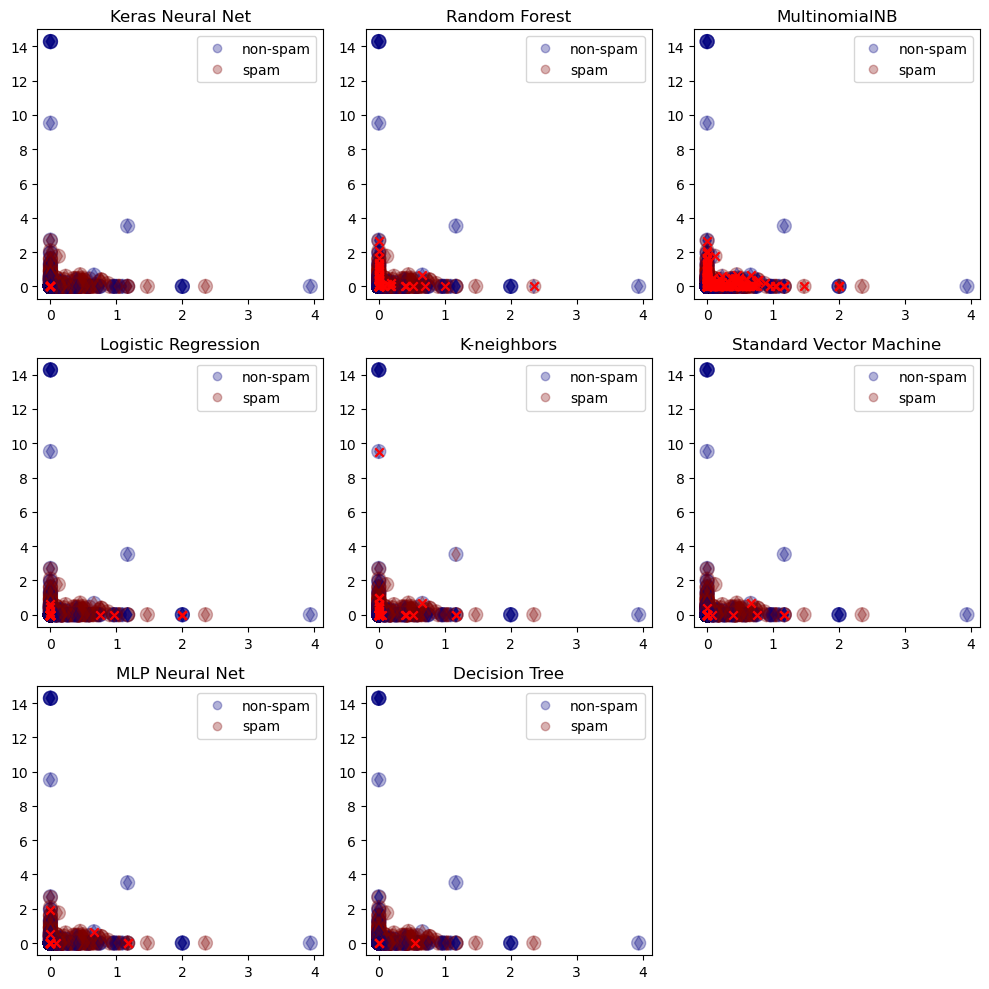

In [17]:
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc

classifiers = ['Keras Neural Net', 'Random Forest', 'MultinomialNB', 'Logistic Regression', 'K-neighbors', 'Standard Vector Machine', 'MLP Neural Net', 'Decision Tree']
grids = [grid_search_keras, grid_search_rf, grid_search_nb, grid_search_lr, grid_search_kn, grid_search_svm, grid_search_mlp, grid_search_dt]

# Get points with low confidence
def get_low_confidence(model, X_in, min_confidence=0.8):
    y_pred = model.predict_proba(X_in)
    anomaly_ids = np.where((y_pred < min_confidence) & (y_pred > (1-min_confidence)))
    return X_in[anomaly_ids[0]]

fig = plt.figure(dpi=100, figsize=(5, 5))
plt.title("ROC Curves")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
num_grids = len(grids)
dim = math.ceil(math.sqrt(num_grids))
roc_display = None

for i, model in enumerate(grids):
    ax = plt.gca()
    roc_display = RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax, name=classifiers[i], alpha=0.8)
fig.tight_layout()
plt.show()

fig = plt.figure(dpi=100, figsize=(7, 7))
for i, model in enumerate(grids):
    fig.add_subplot(dim, dim, i+1)
    plt.title(classifiers[i])
    ax = plt.gca()
    cm_display = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax)
fig.tight_layout()
plt.show()

from IPython.display import display, HTML

for i, model in enumerate(grids):
    predictions = model.predict(X_test)
    report = classification_report(y_test, predictions, output_dict=True)
    df = pd.DataFrame(report).transpose()
    df.round(decimals=2)
    title = f"<h2>{classifiers[i]}</h2>"
    display(HTML(title))
    display(HTML(df.to_html()))

fig = plt.figure(dpi=100, figsize=(10, 10))
for i, model in enumerate(grids):
    fig.add_subplot(dim, dim, i+1)
    plt.title(classifiers[i])
    predictions = model.predict(X_test)
    _X_anom = get_low_confidence(model, X_test, 0.6)

    ax = plt.gca()
    scatter1 = plt.scatter(X_test[:,0],X_test[:,1],c=y_test,marker='o',s=100,alpha=0.3, label="test")
    scatter2 = plt.scatter(X_test[:,0],X_test[:,1],c=predictions,marker='d',s=50,alpha=0.3, label="predictions")
    scatter3 = plt.scatter(_X_anom[:,0],_X_anom[:,1],color='red',marker='x', label="anomalies", alpha=0.8)
    handles = scatter1.legend_elements()[0]
    # print(handles)
    plt.legend(handles=handles, labels=['non-spam', 'spam'])

plt.tight_layout()
plt.show()

### Brief analysis of the results

Neural nets gave the best results, i.e. least amount of false positives and false negatives. However, exclusing multinomial nb, most of the results were fairly close to them.

The hyperparameters and the amount of combinations in grid search were decided in haste for this project. If more effort was used to find the optimal hyperparameters, accuracy would likely be higher for all of the models. It would've also been more optimal to use random search before grid search, to evaluate which hyperparameters effect the results the most.

Also, it is possible that the dataset used in this evaluation was simply too small to find an accurate model.

